# Exploring Potential Relationships between User Ratings and Critic Ratings Between Different Entertainment Software Rating Board (ESRB) Ratings

## Introduction

The rise in popularity of video games has inserted itself in many people’s lives, as and such, the introduction for a rating system was deemed necessary. The Entertainment Software Rating Board (ESRB) was established to inform consumers about the games that are being played. Particularly, parents highly value understanding details of the games their children participate in playing. The dataset we will be using to perform our analysis was sourced from kaggle.com and was generated by a scrape of VGChartz (Video Game Charts), a reputable industry research firm that publishes video game data. The Video Games Sales 2019 dataset consists of 55,792 observations and 16 columns as follows: 

10 numerical variables: 
- `Rank` : Ranking of overall sales 
- `Critic_Score` : Third party rating out of 10
- `User_Score` : Open-sourced rating out of 10
- `Total_Shipped` : Total shipped copies of the game
- `Global_Sales` : Total worldwide sales (in millions)
- `NA_Sales` : Sales in North America (in millions)
- `PAL_Sales` : Sales in Europe (in millions)
- `JP_Sales` : Sales in Japan (in millions)
- `Other_Sales` : Sales in the rest of the world (in millions)
- `Year` : Year of release of the game

6 categorical variables:
- `Name` : Name of the game
- `Platform` : Platform that the game is played on (PC, PS4, XOne, etc.)
- `Genre` : Genre of the game
- `ESRB_Rating` : ESRB Rating of the game (E - Everyone, E10 - Everyone (10+), T - Teen (13+), M - Mature (17+))
- `Publisher` : Publisher of the game
- `Developer` : Developer of the game

This is a good dataset to use to answer our research question. The dataset was composed of the best-selling games, which implies that the user and critic scores are a good representation of the population of all users and critics. The sample we collected is sufficiently random because some games are missing some data needed for this project and there doesn’t seem to be a common pattern, so this sample is unbiased. 

For the purpose of our project, we chose to only use the `ESRB_Rating`, `Critic_Score`, and `User_Score`. Using this dataset, we plan to ask the question: Between different ESRB ratings, how differently do critics and users rate video games? In answering this question, we hope to discover any discrepancies between user and critic scores within different ESRB age-ratings and apply any findings to some of the research that already exists in this topic.

Since we used some parametric techniques, we assumed the population of the data was normally distributed. Also, regarding the randomness, our sample comes from a dataset containing the most popular 55,000 games which is a lot of games, but estimates suggest that there are approximately 831,000 games in the world (Web Tribunal, 2022). We assumed that our sample was good since we estimate that the vast majority of video games don’t have enough players or have a good number of user and critic ratings for the interpretations to be meaningful.

## Methods and Results

To answer our research question, we used bootstrapping and asymptotics to construct hypothesis tests, specifically four one-sample t-tests tested on a 95% confidence interval at a 5% significance level ($\alpha = 0.05$), on the difference of means between `User_Score` and `Critic_Score` for each `ESRB_Rating`. 

**Test statistic:** The difference in means between `User_Score` and `Critic_Score` ($\overline{x}_{u} - \overline{x}_{c}$).  
**Null hypothesis:** There is no difference between the differences of user score and critic score.  
**Alternative hypothesis:** There may be a difference between the differences of user score and critic score.   

$H_{0}^{E}$: $\mu_{u}^{E} - \mu_{c}^{E} = 0$  
$H_{1}$: $\mu_{u}^{E} - \mu_{c}^{E} \neq 0$


$H_{0}^{E10}$: $\mu_{u}^{E10} - \mu_{c}^{E10} = 0$  
$H_{1}^{E10}$: $\mu_{u}^{E10} - \mu_{c}^{E10} \neq 0$


$H_{0}^{M}$: $\mu_{u}^{M} - \mu_{c}^{M} = 0$  
$H_{1}^{M}$: $\mu_{u}^{M} - \mu_{c}^{M} \neq 0$


$H_{0}^{T}$: $\mu_{u}^{T} - \mu_{c}^{T} = 0$  
$H_{1}^{T}$: $\mu_{u}^{T} - \mu_{c}^{T} \neq 0$

First, we loaded the necessary libraries and read the Video Game Sales 2019 dataset (Figure 1). Next, we tidied our data by selecting the variables that will contribute to our analysis (`Critic_Score`, `User_Score`, and `ESRB_Rating`), and filtering out NA and/or "" values from the three variables (Figure 2). 

In [1]:
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(datateachr))
suppressPackageStartupMessages(library(digest))
suppressPackageStartupMessages(library(infer))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(taxyvr))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(broom))

#### Original Dataset

In [2]:
temp <- tempfile()
download.file("https://cdn.discordapp.com/attachments/993991150010642472/1000890019470377092/archive.zip",temp, mode = "wb")
con <- unz(temp, "vgsales-12-4-2019.csv")
data <- read.csv(con)
unlink(temp)
head(data)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,⋯,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>
1,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NA,7.7,⋯,NA,NA,NA,NA,2006,,http://www.vgchartz.com/game/2667/wii-sports/?region=All,1,NA,/games/boxart/full_2258645AmericaFrontccc.jpg
2,2,Super Mario Bros.,super-mario-bros,Platform,,NES,Nintendo,Nintendo EAD,NA,10.0,⋯,NA,NA,NA,NA,1985,,http://www.vgchartz.com/game/6455/super-mario-bros/?region=All,1,NA,/games/boxart/8972270ccc.jpg
3,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NA,8.2,⋯,NA,NA,NA,NA,2008,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-wii/?region=All,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
4,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,,PC,PUBG Corporation,PUBG Corporation,NA,NA,⋯,NA,NA,NA,NA,2017,13th Nov 18,http://www.vgchartz.com/game/215988/playerunknowns-battlegrounds/?region=All,1,NA,/games/boxart/full_8052843AmericaFrontccc.jpg
5,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NA,8.0,⋯,NA,NA,NA,NA,2009,,http://www.vgchartz.com/game/24656/wii-sports-resort/?region=All,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
6,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NA,9.4,⋯,NA,NA,NA,NA,1998,,http://www.vgchartz.com/game/4030/pokemon-red-green-blue-version/?region=All,1,NA,/games/boxart/full_6442337AmericaFrontccc.png


*Figure 1.* Figure of the original dataset.

#### Tidy Data

In [3]:
wrangled_data <- data %>%
    filter(!is.na(Critic_Score),
           !is.na(User_Score),
           !(ESRB_Rating == "")) %>%
    select(Critic_Score, User_Score, ESRB_Rating) %>%
    as_tibble() %>%
    mutate(ESRB_Rating = as.factor(ESRB_Rating))
head(wrangled_data)

Critic_Score,User_Score,ESRB_Rating
<dbl>,<dbl>,<fct>
8.2,9.1,E
8.0,8.8,E
9.1,8.1,E
8.6,9.2,E
5.9,4.5,E
9.1,9.4,E


*Figure 2*. Figure of the tidy data.

#### Summary Statistics
After tidying our data, we calculated some summary statistics including count, mean, median, standard deviation, and standard error of user and critic scores for each ESRB rating. 

In [4]:
summary <- wrangled_data %>%
    group_by(ESRB_Rating) %>%
    summarize(count = n(),
              mean_critic_score = mean(Critic_Score), 
              mean_user_score = mean(User_Score), 
              median_critic_score = median(Critic_Score), 
              median_user_score = median(User_Score),
              sd_critic_score = sd(Critic_Score), 
              sd_user_score = sd(User_Score),
              se_critic_score = sd(Critic_Score)/sqrt(count), 
              se_user_score = sd(User_Score)/sqrt(count))
summary

ESRB_Rating,count,mean_critic_score,mean_user_score,median_critic_score,median_user_score,sd_critic_score,sd_user_score,se_critic_score,se_user_score
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,41,8.178049,8.617073,8.3,9.0,1.118819,1.2041392,0.1747302,0.1880549
E10,23,7.595652,8.265217,7.7,8.5,1.414689,1.5746886,0.2949830,0.3283453
M,73,8.382192,8.600000,8.6,8.8,1.190511,0.8993825,0.1393388,0.1052648
T,77,8.036364,8.644156,8.1,9.0,1.134844,0.9597825,0.1293275,0.1093774


*Table 1.* Table of summary statistics.

#### Boxplots
To visualize the comparison between user and critic scores for each ESRB rating, we plotted side-by-side boxplots (Figure 3). Notice that the medians of user scores between different ESRB ratings differ less than the medians of critic scores. We also observed that the quantiles are more similar in user scores than critic scores and the range of rating values is greater for critic scores.

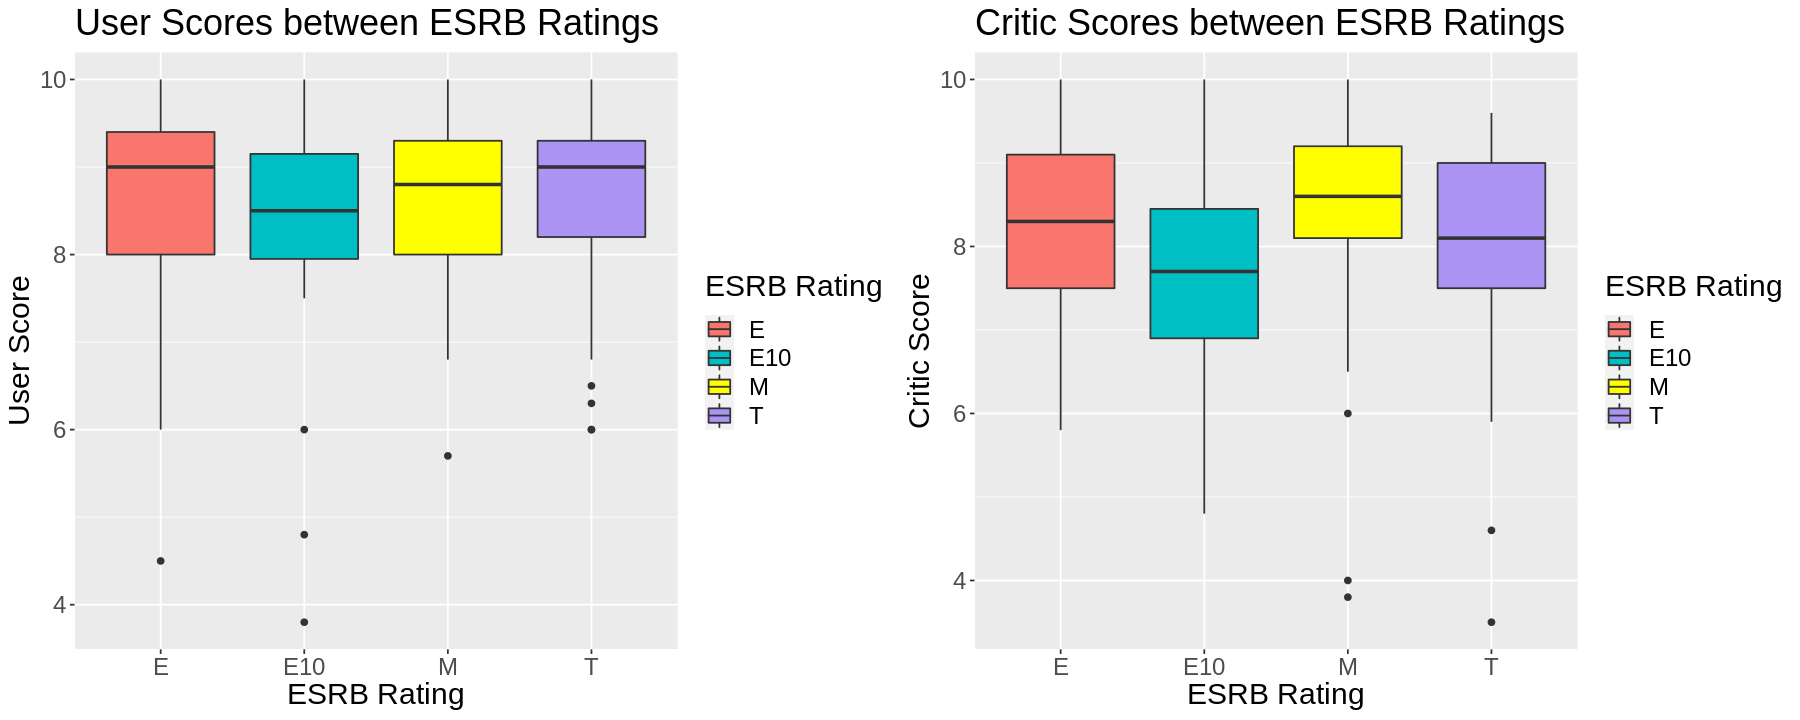

In [5]:
options(repr.plot.height = 6, repr.plot.width = 15)

dist_user <- wrangled_data %>%
    ggplot(aes(x = ESRB_Rating, y = User_Score, fill = ESRB_Rating)) +
    geom_boxplot() +
    labs(x = "ESRB Rating", y = "User Score", title = "User Scores between ESRB Ratings", fill = "ESRB Rating") +
    theme(text = element_text(size = 18)) + 
    scale_fill_manual(values=c("#F8766D", "#00BFC4", "#FFFF00", "#AC94F4"))

dist_critic <- wrangled_data %>%
    ggplot(aes(x = ESRB_Rating, y = Critic_Score, fill = ESRB_Rating)) +
    geom_boxplot() +
    labs(x = "ESRB Rating", y = "Critic Score", title = "Critic Scores between ESRB Ratings", fill = "ESRB Rating") +
    theme(text = element_text(size = 18)) + 
    scale_fill_manual(values = c("#F8766D", "#00BFC4", "#FFFF00", "#AC94F4"))


plot_grid(dist_user, dist_critic)

*Figure 3.* Figure showing side-by-side boxplots.

#### Sample Distributions
To further visualize the comparison between user and critic scores, we plotted the sample distributions of difference in means for each ESRB rating. We observed that each sample distribution is unimodal; however, the Mature and Teen ratings have more obvious peaks. This is likely because the Everyone and Everyone (10+) ratings have smaller sample sizes.

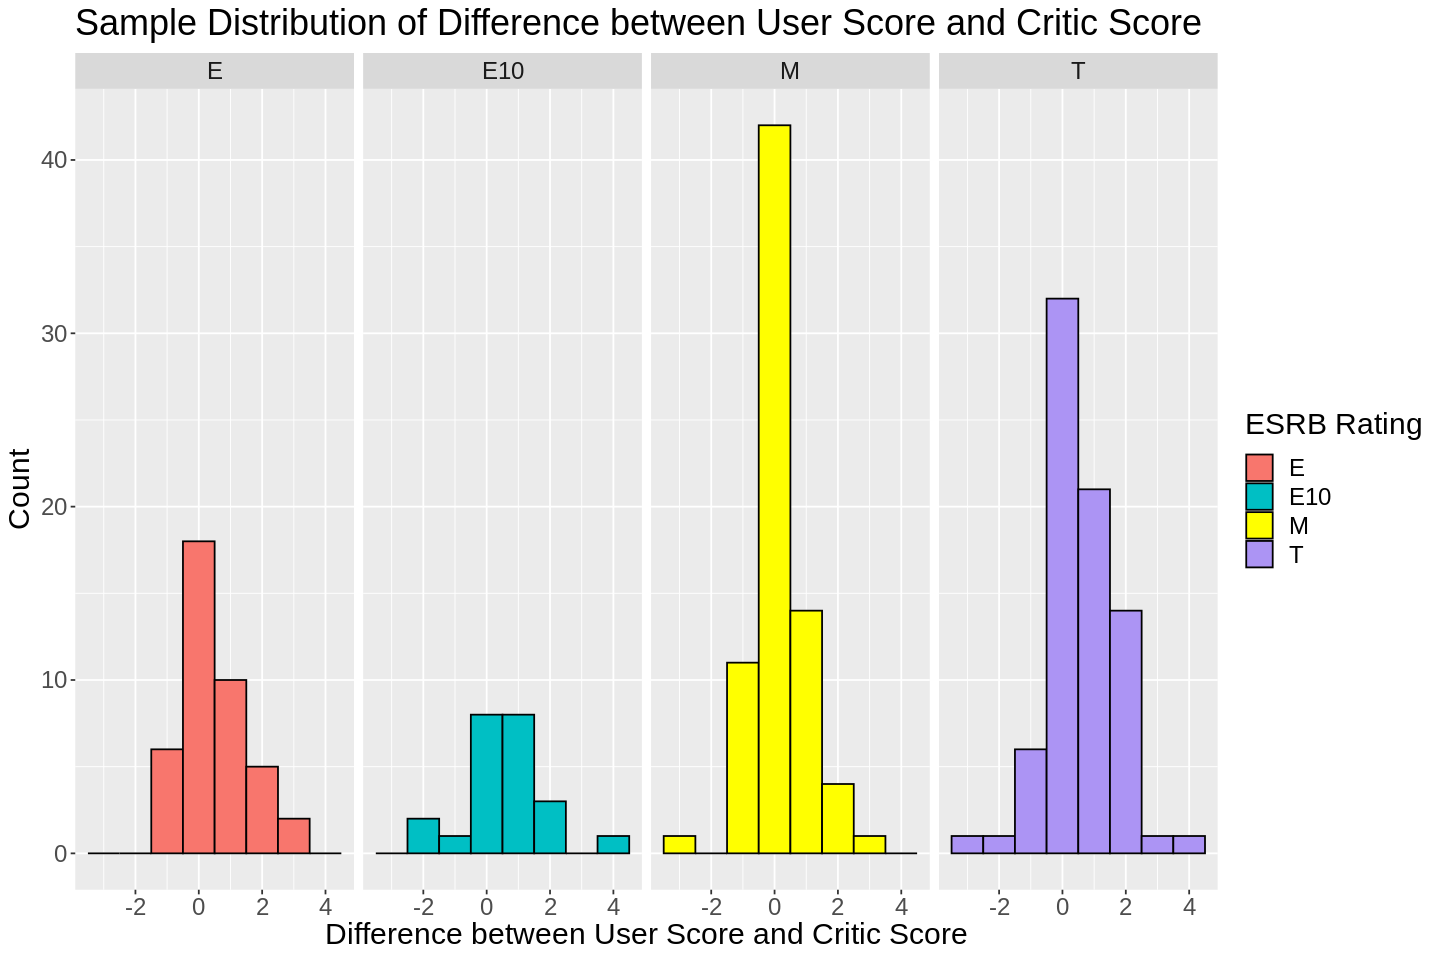

In [6]:
options(repr.plot.height = 8, repr.plot.width = 12)
set.seed(666)

sample_dist <- wrangled_data %>%
    mutate(diff = User_Score - Critic_Score) %>%
    ggplot(aes(x = diff, fill = ESRB_Rating)) +
    geom_histogram(binwidth = 1, color = 1) + 
    facet_grid(. ~ ESRB_Rating) +
    scale_fill_manual(values = c("#F8766D", "#00BFC4", "#FFFF00", "#AC94F4")) +
    labs(x = "Difference between User Score and Critic Score", y = "Count", fill = "ESRB Rating") +
    ggtitle("Sample Distribution of Difference between User Score and Critic Score") +
    theme(text = element_text(size = 18))
sample_dist

*Figure 4.* Figure of the sample distributions of the difference in means.

### Hypothesis Testing: One-Sample t-test

To perform our hypothesis tests, we used bootstrapping and asymptotics to construct four one-sample t-tests (one for each ESRB rating) on a 95% confidence interval at a 5% significance level.

First, we made a new column called `diff` which is the difference between `User_Score` and `Critic_Score`. Next, we constructed four one-sample t-tests by using the `infer` workflow to perform simulation-based techniques. We also performed four one-sample t-tests using asymptotic methods.

We filtered each ESRB rating from our tidy data. Then we used the `infer` workflow to calculate the observed test statistics (Table 2) and null distributions for each ESRB rating. After that, we plotted each of the null distributions (Figure 5). 

In [7]:
set.seed(666)

sample_E <- wrangled_data %>%
    filter(ESRB_Rating == "E") %>%
    mutate(diff = User_Score - Critic_Score)

obs_test_stat_E <- sample_E %>%
    specify(response = diff) %>%
    calculate(stat = "mean")

null_dist_E <- sample_E %>%
    specify(response = diff) %>%
    hypothesize(null = "point", mu = 0) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

null_dist_E_plot <- null_dist_E %>%
    visualize(bins = 10) +
    labs(x = "Difference in Means", title = "Simulation-Based Null Distribution (E)") +
    theme(text = element_text(size = 12)) + 
    shade_p_value(obs_stat = obs_test_stat_E, direction = "both")

In [8]:
set.seed(666)
sample_E10 <- wrangled_data %>%
    filter(ESRB_Rating == "E10") %>%
    mutate(diff = User_Score - Critic_Score)

obs_test_stat_E10 <- sample_E10 %>%
    specify(response = diff) %>%
    calculate(stat = "mean")

null_dist_E10 <- sample_E10 %>%
    specify(response = diff) %>%
    hypothesize(null = "point", mu = 0) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

null_dist_E10_plot <- null_dist_E10 %>%
    visualize(bins = 10) +
    labs(x = "Difference in Means", title = "Simulation-Based Null Distribution (E10)") +
    theme(text = element_text(size = 12)) + 
    shade_p_value(obs_stat = obs_test_stat_E10, direction = "both")

In [9]:
set.seed(666)

sample_M <- wrangled_data %>%
    filter(ESRB_Rating == "M") %>%
    mutate(diff = User_Score - Critic_Score)

obs_test_stat_M <- sample_M %>%
    specify(response = diff) %>%
    calculate(stat = "mean")

null_dist_M <- sample_M %>%
    specify(response = diff) %>%
    hypothesize(null = "point", mu = 0) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

null_dist_M_plot <- null_dist_M %>%
    visualize(bins = 10) +
    labs(x = "Difference in Means", title = "Simulation-Based Null Distribution (M)") +
    theme(text = element_text(size = 12)) + 
    shade_p_value(obs_stat = obs_test_stat_M, direction = "both")

In [10]:
set.seed(666)

sample_T <- wrangled_data %>%
    filter(ESRB_Rating == "T") %>%
    mutate(diff = User_Score - Critic_Score) 

obs_test_stat_T <- sample_T %>%
    specify(response = diff) %>%
    calculate(stat = "mean")

null_dist_T <- sample_T %>%
    specify(response = diff) %>%
    hypothesize(null = "point", mu = 0) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

null_dist_T_plot <- null_dist_T %>%
    visualize(bins = 10) +
    labs(x = "Difference in Means", title = "Simulation-Based Null Distribution (T)") +
    theme(text = element_text(size = 12)) + 
    shade_p_value(obs_stat = obs_test_stat_T, direction = "both")

#### Simulation-Based Observed Test Statistics

In [11]:
set.seed(666)

obs_test_stat_results <- tibble("Rating" = c("E", "E10", "M", "T"),
                                "Observed Test Statistic" = c(obs_test_stat_E, obs_test_stat_E10, obs_test_stat_M, obs_test_stat_T))
obs_test_stat_results

Rating,Observed Test Statistic
<chr>,<named list>
E,0.4390244
E10,0.6695652
M,0.2178082
T,0.6077922


*Table 2.* Table of observed test statistics using infer workflow.

#### Simulation-Based Null Distributions 
We plotted the null distributions for each ESRB rating and shaded their p-values on their respective plot.

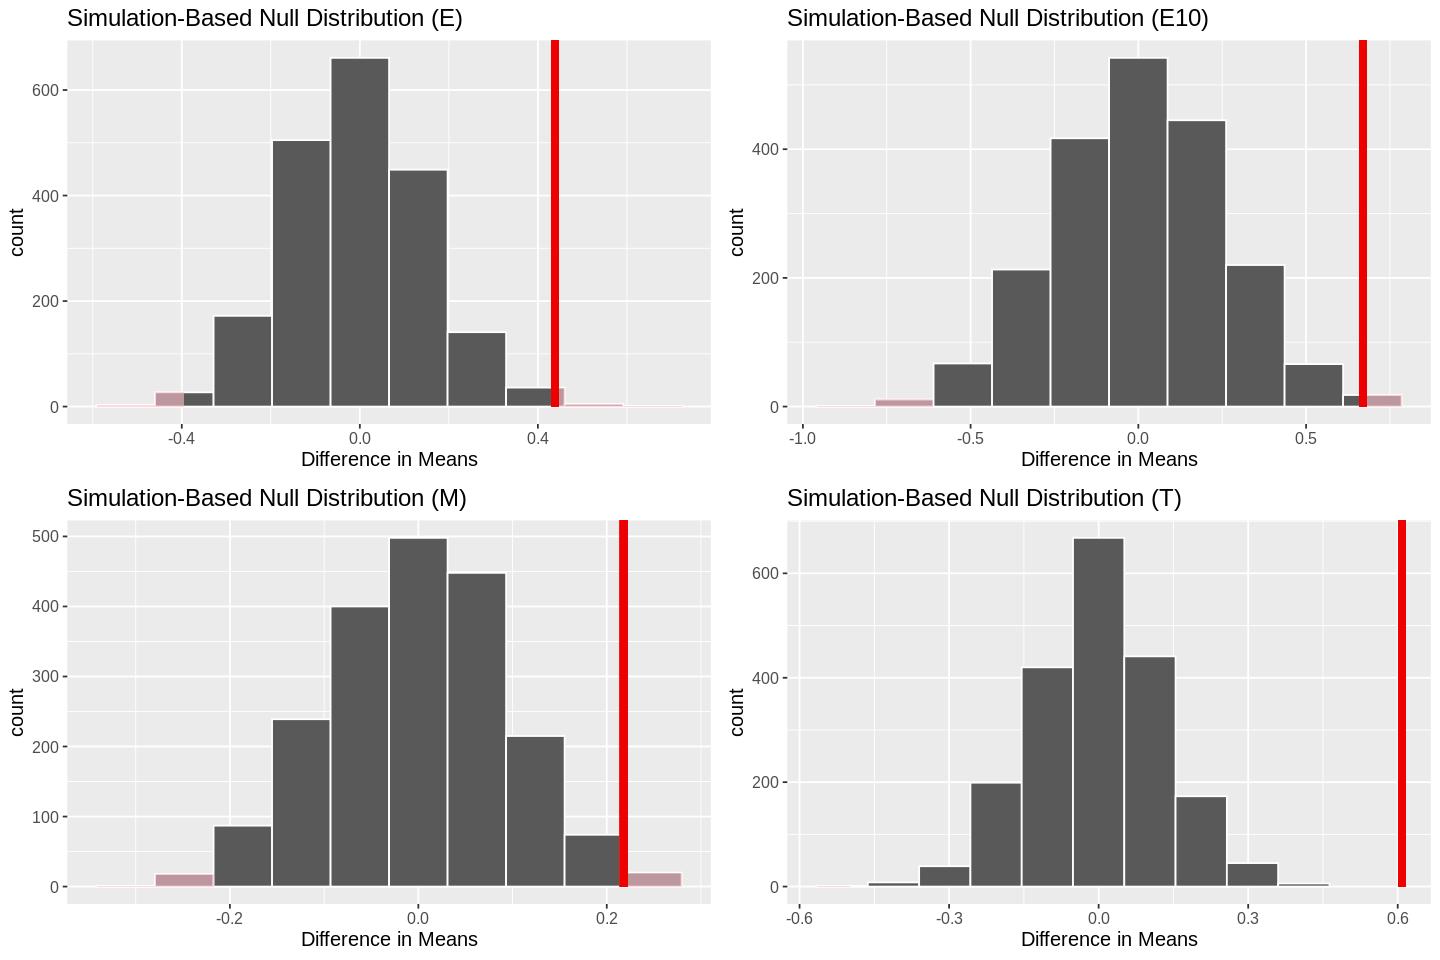

In [12]:
options(repr.plot.height = 8, repr.plot.width = 12)
set.seed(666)

plot_grid(null_dist_E_plot, null_dist_E10_plot, null_dist_M_plot, null_dist_T_plot)

*Figure 5.* Figure of the simulated null distribution plots.

#### Simulation-Based p-values
We also found the p-values for each ESRB rating which are shaded in Figure 5.

In [13]:
set.seed(666)
options(warn=-1)

p_value_E <- null_dist_E %>%
    get_p_value(obs_stat = obs_test_stat_E, direction = "both")

p_value_E10 <- null_dist_E10 %>%
    get_p_value(obs_stat = obs_test_stat_E10, direction = "both")

p_value_M <- null_dist_M %>%
    get_p_value(obs_stat = obs_test_stat_M, direction = "both")

p_value_T <- null_dist_T %>%
    get_p_value(obs_stat = obs_test_stat_T, direction = "both")


p_value_results <- tibble("Rating" = c("E", "E10", "M", "T"),
                          "p-value" = c(p_value_E, p_value_E10, p_value_M, p_value_T)) 
p_value_results

Rating,p-value
<chr>,<named list>
E,0.007
E10,0.011
M,0.019
T,0


*Table 3.* Table of simulated p-values.

Earlier, we established that we would test at a 5% significance level, so we will reject the null hypothesis for all four hypothesis tests because all the p-values are less than $\alpha = 0.05$.

#### Simulation-Based Bootstrap Distribution
We also constructed bootstrap distributions for each ESRB rating using the `infer` workflow which shows the 95% confidence interval shaded (Figure 6). 

In [14]:
set.seed(666)

bootstrap_dist_E <- sample_E %>%
    specify(response = diff) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

ci_E <- bootstrap_dist_E %>%
    get_confidence_interval(level = 0.95, type = "percentile")

ci_E_plot <- bootstrap_dist_E %>%
    visualize(bins = 10) +
    shade_ci(ci_E, fill = "#F8766D", color = "#F8766D") +
    labs(title = "Everyone Rating", x = "Difference between User and Critic Score") +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 18))

In [15]:
set.seed(666)

bootstrap_dist_E10 <- sample_E10 %>%
    specify(response = diff) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

ci_E10 <- bootstrap_dist_E10 %>%
    get_confidence_interval(level = 0.95, type = "percentile")

ci_E10_plot <- bootstrap_dist_E10 %>%
    visualize(bins = 10) +
    shade_ci(ci_E10, fill = "#00BFC4", color = "#00BFC4") +
    labs(title = "Everyone (10+) Rating", x = "Difference between User and Critic Score") +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 18))

In [16]:
set.seed(666)

bootstrap_dist_M <- sample_M %>%
    specify(response = diff) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

ci_M <- bootstrap_dist_M %>%
    get_confidence_interval(level = 0.95, type = "percentile")

ci_M_plot <- bootstrap_dist_M %>%
    visualize(bins = 10) +
    shade_ci(ci_M, fill = "#FFFF00", color = "#FFFF00") +
    labs(title = "Mature Rating", x = "Difference between User and Critic Score") +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 18))

In [17]:
set.seed(666)

bootstrap_dist_T <- sample_T %>%
    specify(response = diff) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

ci_T <- bootstrap_dist_T %>%
    get_confidence_interval(level = 0.95, type = "percentile")

ci_T_plot <- bootstrap_dist_T %>%
    visualize(bins = 10) +
    shade_ci(ci_T, fill = "#AC94F4", color = "#AC94F4") +
    labs(title = "Teen Rating", x = "Difference between User and Critic Score") +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 18))

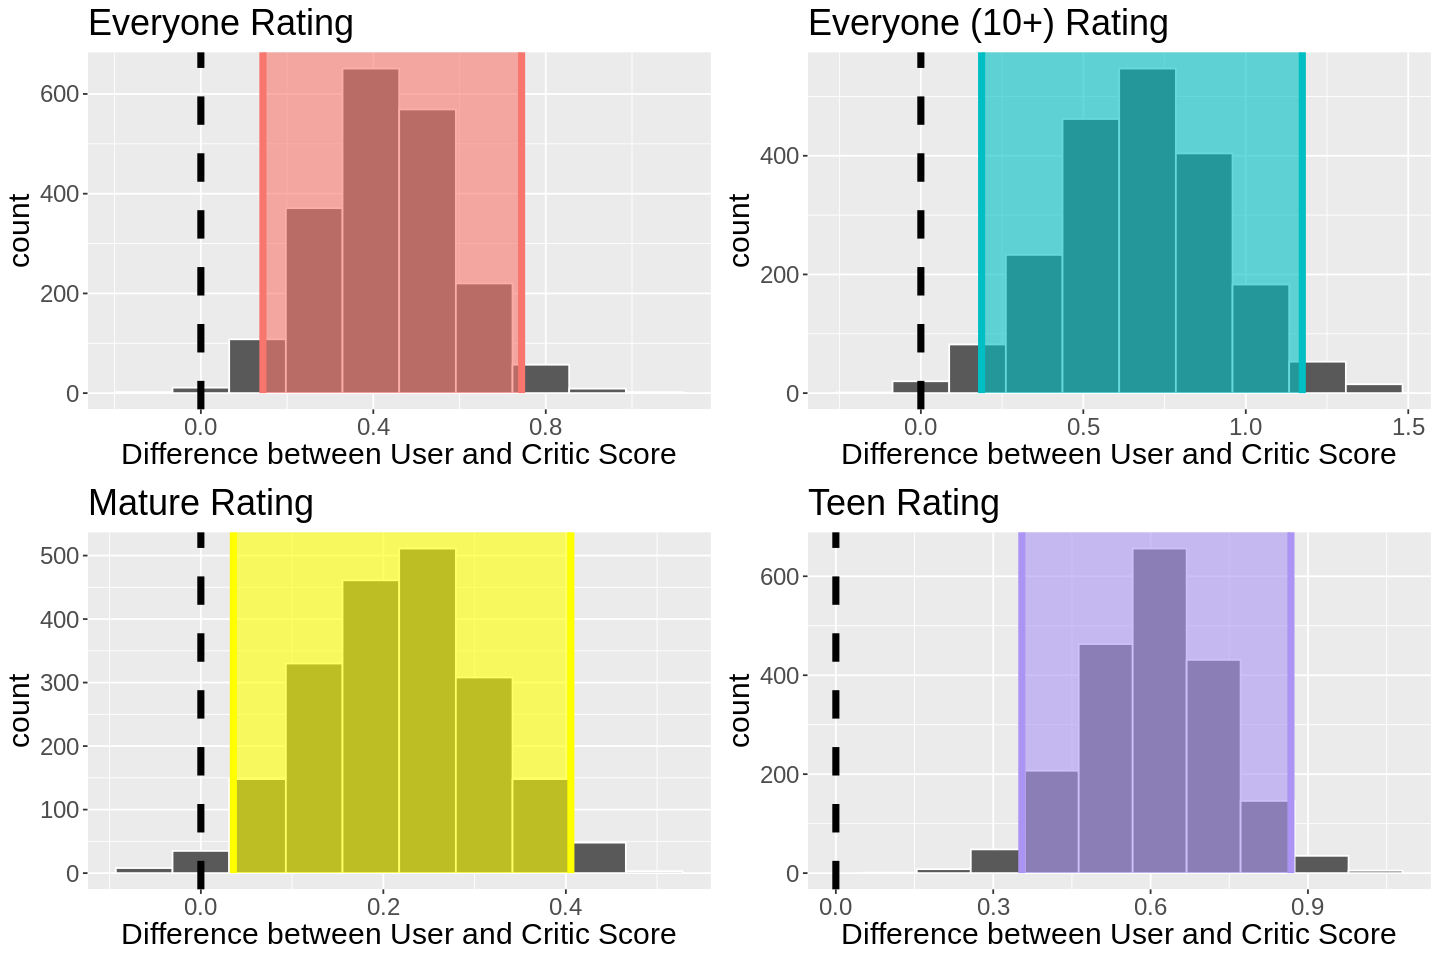

In [18]:
options(repr.plot.height = 8, repr.plot.width = 12)
set.seed(666)

plot_grid(ci_E_plot, ci_E10_plot, ci_M_plot, ci_T_plot)

*Figure 6.* Figure of simulated bootstrap distributions for the 95% confidence intervals of the sample statistic.

#### Simulation-Based Confidence Interval
We tabulated the exact values of the lower and upper bounds from the simulated 95% confidence intervals for each ESRB rating (Table 4).

In [19]:
set.seed(666)

ci_results <- tibble("Rating" = c("E", "E10", "M", "T"),
                     "Lower CI" = c(ci_E$lower_ci, ci_E10$lower_ci, ci_M$lower_ci, ci_T$lower_ci),
                     "Upper CI" = c(ci_E$upper_ci, ci_E10$upper_ci, ci_M$upper_ci, ci_T$upper_ci)) 
ci_results

Rating,Lower CI,Upper CI
<chr>,<dbl>,<dbl>
E,0.14390244,0.7439634
E10,0.18695652,1.1739130
M,0.03561644,0.4054795
T,0.35451299,0.8675649


*Table 4.* Table of simulation-based 95% confidence intervals.

#### Bootstrap Simulation for Point Estimates
We visualized our results from the bootstrap simulation by plotting it and shading the 95% confidence interval as well as representing the difference in means for each ESRB rating on their respective plot (Figure 7). 

In [20]:
set.seed(666)

E_mean <- sample_E %>%
    summarize(mean = mean(diff)) %>%
    pull()

E_bootstrap <- sample_E %>%
    specify(response = diff) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

E_percentile_ci <- E_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

E_percentile_ci_plot <- E_bootstrap %>%
    visualize(binwidth = 0.05) +
    shade_ci(E_percentile_ci, fill = "#F8766D", color = "#F8766D") +
    labs(title = "Everyone Rating", x = "Sample mean of difference") +
    geom_vline(xintercept = E_mean, size = 2, linetype = "dashed") +
    scale_x_continuous(limits = c(-0.5, 1.6)) +
    theme(text = element_text(size = 18))

In [21]:
set.seed(666)

E10_mean <- sample_E10 %>%
    summarize(mean = mean(diff)) %>%
    pull()

E10_bootstrap <- sample_E10 %>%
    specify(response = diff) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

E10_percentile_ci <- E10_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

E10_percentile_ci_plot <- E10_bootstrap %>%
    visualize(binwidth = 0.05) +
    shade_ci(E10_percentile_ci, fill = "#00BFC4", color = "#00BFC4") +
    labs(title = "Everyone (10+) Rating", x = "Sample mean of difference") +
    geom_vline(xintercept = E10_mean, size = 2, linetype = "dashed") +
    scale_x_continuous(limits = c(-0.5, 1.6)) +
    theme(text = element_text(size = 18))

In [22]:
set.seed(666)

M_mean <- sample_M %>%
    summarize(mean = mean(diff)) %>%
    pull()

M_bootstrap <- sample_M %>%
    specify(response = diff) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

M_percentile_ci <- M_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

M_percentile_ci_plot <- M_bootstrap %>%
    visualize(binwidth = 0.05) +
    shade_ci(M_percentile_ci, fill = "#FFFF00", color = "#FFFF00") +
    labs(title = "Mature Rating", x = "Sample mean of difference") +
    geom_vline(xintercept = M_mean, size = 2, linetype = "dashed") +
    scale_x_continuous(limits = c(-0.5, 1.6)) +
    theme(text = element_text(size = 18))

In [23]:
set.seed(666)

T_mean <- sample_T %>%
    summarize(mean = mean(diff)) %>%
    pull()

T_bootstrap <- sample_T %>%
    specify(response = diff) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "mean")

T_percentile_ci <- T_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

T_percentile_ci_plot <- T_bootstrap %>%
    visualize(binwidth = 0.05) +
    shade_ci(T_percentile_ci, fill = "#AC94F4", color = "#AC94F4") +
    labs(title = "Teen Rating", x = "Sample mean of difference") +
    geom_vline(xintercept = T_mean, size = 2, linetype = "dashed") +
    scale_x_continuous(limits = c(-0.5, 1.6)) +
    theme(text = element_text(size = 18))

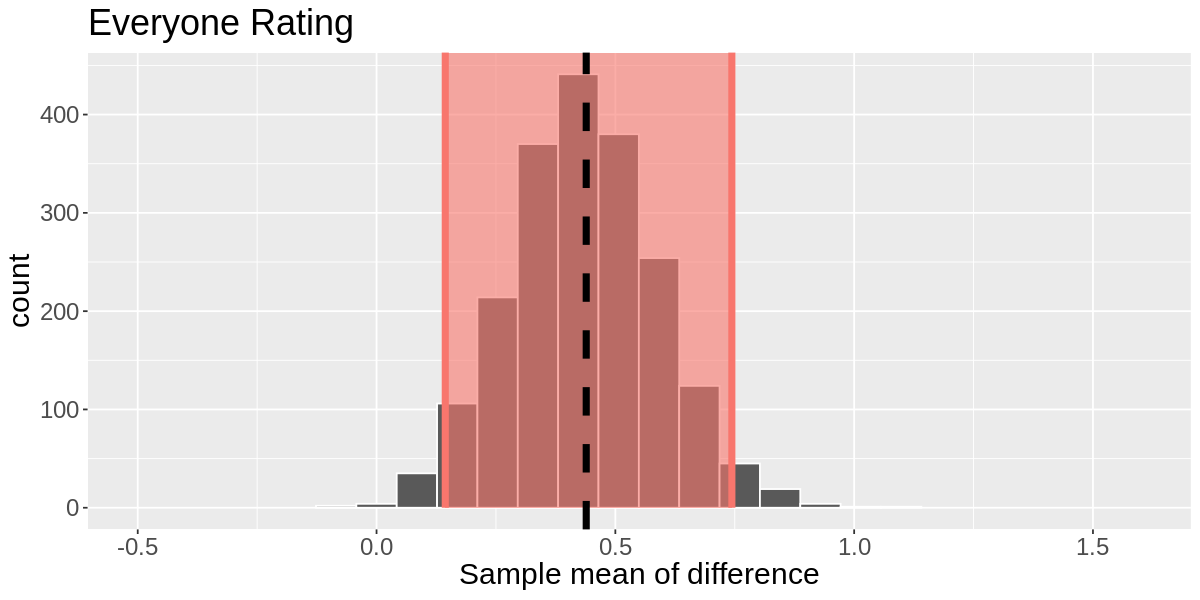

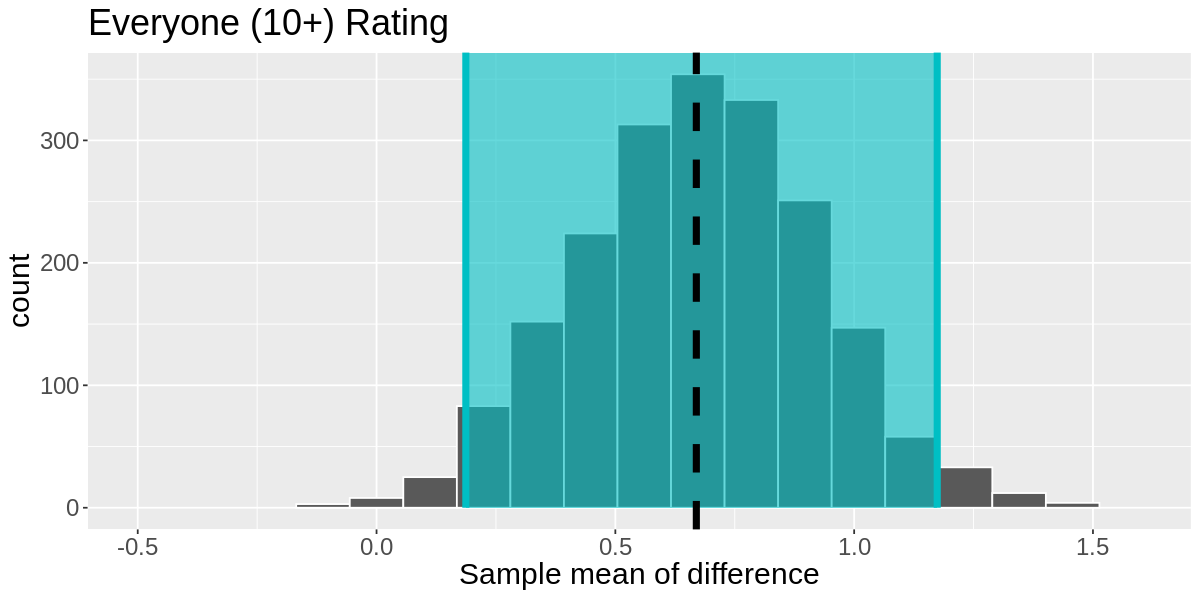

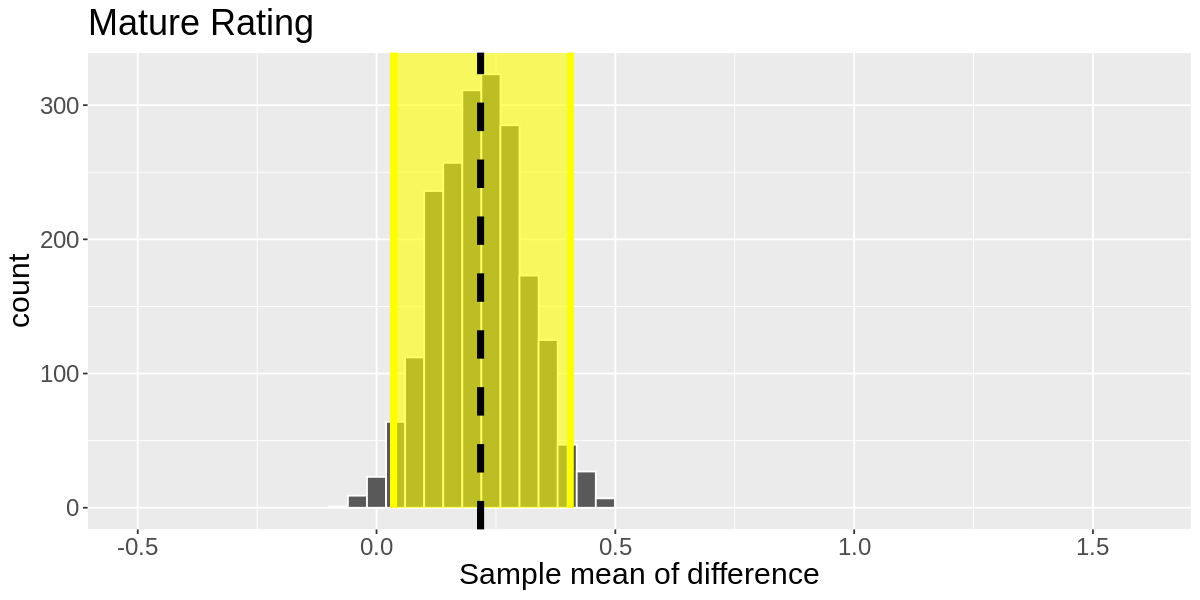

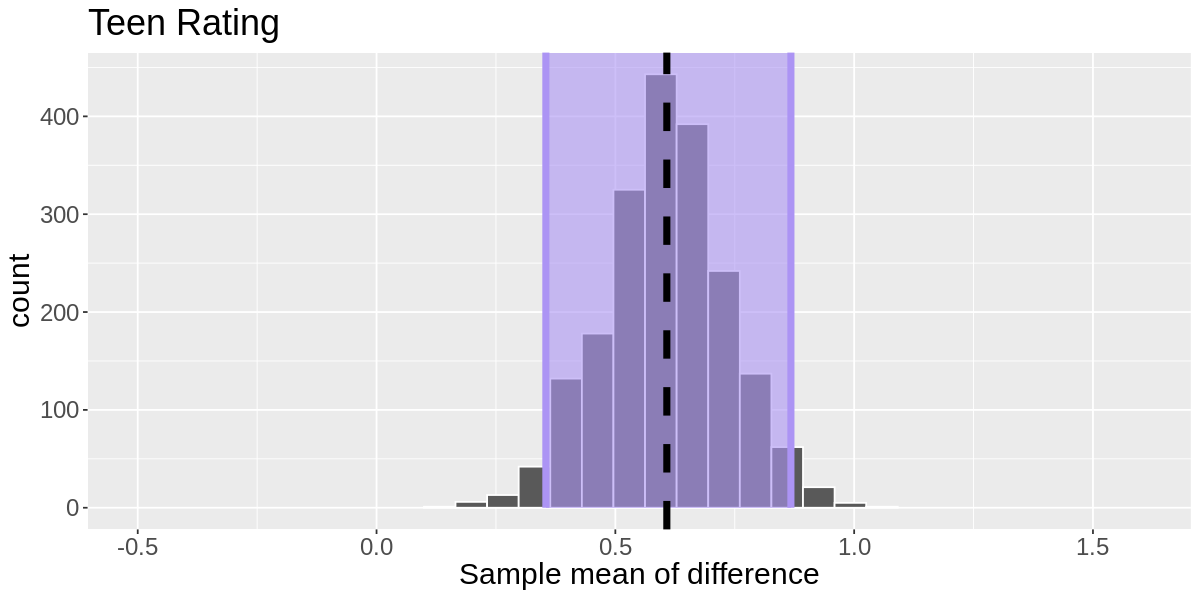

In [24]:
options(repr.plot.height = 5, repr.plot.width = 10)
set.seed(666)

E_percentile_ci_plot
E10_percentile_ci_plot
M_percentile_ci_plot
T_percentile_ci_plot

*Figure 7.* Figure to compare the bootstrap distribution of the test statistics.

We observed that there are slight discrepancies in the difference of means between the ESRB ratings.

In [25]:
results <- tibble("Rating" = c("E", "E10", "M", "T"),
                  "Point Estimate" = c(E_mean, E10_mean, M_mean, T_mean),
                  "Lower CI" = c(E_percentile_ci$lower_ci, E10_percentile_ci$lower_ci, M_percentile_ci$lower_ci, T_percentile_ci$lower_ci),
                  "Upper CI" = c(E_percentile_ci$upper_ci, E10_percentile_ci$upper_ci, M_percentile_ci$upper_ci, T_percentile_ci$upper_ci)) 
results

Rating,Point Estimate,Lower CI,Upper CI
<chr>,<dbl>,<dbl>,<dbl>
E,0.4390244,0.14390244,0.7439634
E10,0.6695652,0.18695652,1.1739130
M,0.2178082,0.03561644,0.4054795
T,0.6077922,0.35451299,0.8675649


*Table 5.* Table of estimates for difference in means.

We can interpret Table 5 as follows:
- We are approximately 95% confident that our confidence interval (0.144, 0.744) will capture the value of the difference in means ($\mu_{u}^{E} - \mu_{c}^{E}$) for the Everyone rating.

- We are approximately 95% confident that our confidence interval (0.187, 1.174) will capture the value of the difference in means ($\mu_{u}^{E10} - \mu_{c}^{E10}$) for the Everyone (10+) rating.

- We are approximately 95% confident that our confidence interval (0.036, 0.405) will capture the value of the difference in means ($\mu_{u}^{M} - \mu_{c}^{M}$) for the Mature rating.

- We are approximately 95% confident that our confidence interval (0.355, 0.868) will capture the value of the difference in means ($\mu_{u}^{T} - \mu_{c}^{T}$) for the Teen rating.

#### Asymptotic One-Sample t-tests
Finally, we constructed four asymptotic one-sample t-tests to further analyze the difference in means for each ESRB rating and tabulated the results (Table 5).

In [26]:
set.seed(666)
t_test_E <- tidy(t.test(sample_E$diff, alternative = "two.sided", mu = 0, conf.level = 0.95))
t_test_E10 <- tidy(t.test(sample_E10$diff, alternative = "two.sided", mu = 0, conf.level = 0.95))
t_test_M <- tidy(t.test(sample_M$diff, alternative = "two.sided", mu = 0, conf.level = 0.95))
t_test_T <- tidy(t.test(sample_T$diff, alternative = "two.sided", mu = 0, conf.level = 0.95))

t_test_results = tibble("Rating" = c("E", "E10", "M", "T"),
                        "Observed Test Statistic" = c(t_test_E$statistic, t_test_E10$statistic, t_test_M$statistic, t_test_T$statistic),
                        "p-value" = c(t_test_E$p.value, t_test_E10$p.value, t_test_M$p.value, t_test_T$p.value),
                        "Lower CI" = c(t_test_E$conf.low, t_test_E10$conf.low, t_test_M$conf.low, t_test_T$conf.low),
                        "Upper CI" = c(t_test_E$conf.high, t_test_E10$conf.high, t_test_M$conf.high, t_test_T$conf.high))
t_test_results

Rating,Observed Test Statistic,p-value,Lower CI,Upper CI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
E,2.809809,0.0076350313,0.12323728,0.7548115
E10,2.628702,0.0153367833,0.14132225,1.1978082
M,2.249243,0.0275561480,0.02476873,0.4108477
T,4.675407,0.0000124737,0.34887932,0.8667051


*Table 6.* Table of the results of the four asymptotic one-sample t-tests. 

The p-values and 95% confidence intervals obtained from asymptotics are relatively similar to the values we obtained from our simulation-based hypothesis tests as shown below. Therefore, we also reject the null hypothesis from each hypothesis test because the p-values were all less than $\alpha = 0.05$.

##### Simulation-Based one-sample t-test results  

| **Rating** | **Observed Test Statistic** | **p-value** | **Lower CI** | **Upper CI** |
|:----------:|:---------------------------:|:-----------:|:------------:|:------------:|
|      E     |          0.4390244          |    0.007    |  0.14390244  |   0.7439634  |
|     E10    |          0.6695652          |    0.011    |  0.18695652  |   1.1739130  |
|      M     |          0.2178082          |    0.019    |  0.03561644  |   0.4054795  |
|      T     |          0.6077922          |      0      |  0.35451299  |   0.8675649  | 
 
 
##### Asymptotic one-sample t-test results  

| **Rating** | **Observed Test Statistic** |  **p-value** | **Lower CI** | **Upper CI** |
|:----------:|:---------------------------:|:------------:|:------------:|:------------:|
|      E     |           2.809809          | 0.0076350313 |  0.12323728  |   0.7548115  |
|     E10    |           2.628702          | 0.0153367833 |  0.14132225  |   1.1978082  |
|      M     |           2.249243          | 0.0275561480 |  0.02476873  |   0.4108477  |
|      T     |           4.675407          | 0.0000124737 |  0.34887932  |   0.8667051  |

Despite getting similar results, bootstrapping would be more effective than asymptotics for the purpose of answering our research question. While CLT can be assumed for the Everyone, Mature, and Teen ratings because their sample sizes are large enough, it cannot be assumed for the Everyone (10+) rating since the sample size is too small. Therefore, we cannot assume normality for all four ESRB ratings samples and assumed non-normality for each group to be more consistent and effective.

## Discussion

In this project, our inferential question is: Between different ESRB ratings, how differently do critics and users rate video games? We tidied and summarized the data by filtering the four different ESRB ratings, and demonstrated the count, mean, median, standard deviation, and standard error of `Critic_Score` and `User_Score`. We found that the average difference between user and critic score of these four ratings is not very big, which is about ±0.5. The same is true for standard error, which has a smaller difference of ±0.15. We then used the bootstrapping sampling distribution to compute the data because CLT can’t be assumed as the sample sizes are too small (e.g. Teen rating has more than 60 observations, so CLT can be assumed, but we want to be consistent).
 
As the user and critic scores are both rated on 10-point scales, the sample mean of differences between the four ESRB ratings may appear to make a significant difference (e.g. 6.8 vs. 7.3). As the user ratings are openly sourced, any variation of a video game’s consumers could have been a contributor, from a parent to a teenager. The implications and impact behind our findings are varied. We see the highest discrepancy between the Teen and Everyone (10+) categories, which could be attributed to a user audience rating the game with a different perspective than a more nuanced critic rating. For example, the Teen category likely has a user audience of 13-year-olds and older, which could affect the user rating to be higher or lower than a critic would rate it (depending on the game). On the other hand, the difference in means could also be due to a critic’s more intricate and complex rating scale as a professional, compared to a recreational video game player.

#### Expectations
The results from our analysis concurred with our hypothesis that there is a difference in the mean user and critic ratings amongst the four ESRB ratings. From previous studies: “Beyond Today’s Video Game Rating Systems” (Felini, 2014) and “Parental Restrictive Mediation and Children's Violent Video Game Play” (Leczniak et al., 2017), we anticipated that there would be a higher difference in the Everyone and Everyone (10+) ratings due to parental influence, and less of a difference in the Teen and Mature ratings. However, there was little variance between our results. 

Future questions from the completion of our final report include:
- Are there other factors that impact the user scores?
- How involved is the game publisher in developing its ESRB rating? Would a publisher consider appealing to different age groups depending on the results of our study?
- Can there be improvements to the current ESRB rating systems to avoid certain biases that may be found?
- Between critics and users, who is more likely to give a lower rating?
- How do consumers view and consider user and critic ratings differently?

## References

Alqunber, A. (2019). Video games sales 2019. *Kaggle*. https://www.kaggle.com/datasets/ashaheedq/video-games-sales-2019 

ESRB Game Ratings (2022). *ESRB Ratings*. https://www.esrb.org/ 

Felini, D. (2015). Beyond Today’s Video Game Rating Systems: A Critical Approach to PEGI and ESRB, and Proposed Improvements. *Games and Culture, 10*(1), 106-122. https://doi.org/10.1177/1555412014560192 

Laczniak, R. N., Carlson, L., Walker, D., & Brocato, E. D. (2017). Parental Restrictive Mediation and Children's Violent Video Game Play: The Effectiveness of the Entertainment Software Rating Board (ESRB) Rating System. *Journal of Public Policy & Marketing, 36*(1), 70-78. https://doi.org/10.1509/jppm.15.071 

VGChartz Ltd. (2022). About VGChartz. *VGChartz*. https://www.vgchartz.com/about.php